In [24]:
from processing_emisiones import process_emisiones
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
df = process_emisiones()

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  object
 9   PRIMA EMITIDA           816498 non-null  object
 10  SUMA ASEGURADA          816498 non-null  object
dtypes: object(11)
memory usage: 68.5+ MB
None
EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD      

In [26]:
df.columns


Index(['EDAD', 'NUMERO DE ASEGURADOS', 'PRIMA EMITIDA', 'SUMA ASEGURADA',
       'COBERTURA_Ahorro / inversión', 'COBERTURA_Asistencias',
       'COBERTURA_Desempleo/Incapacidad temporal',
       'COBERTURA_Devolución de prima', 'COBERTURA_Dotales corto plazo',
       'COBERTURA_Enfermedades graves', 'COBERTURA_Exención de pago de prima',
       'COBERTURA_Fallecimiento', 'COBERTURA_Gastos funerarios',
       'COBERTURA_Invalidez total y permanente',
       'COBERTURA_Muerte accidental (Doble indemnización)',
       'COBERTURA_Muerte colectiva (Triple indemnización)', 'COBERTURA_Otros',
       'COBERTURA_Pérdidas Orgánicas', 'COBERTURA_Sobrevivencia',
       'PLAN DE LA POLIZA_Dotal Mixto', 'PLAN DE LA POLIZA_Dotal Puro',
       'PLAN DE LA POLIZA_No disponible ', 'PLAN DE LA POLIZA_Otros',
       'PLAN DE LA POLIZA_Rentas', 'PLAN DE LA POLIZA_Temporal',
       'PLAN DE LA POLIZA_Vitalicio', 'MODALIDAD DE LA POLIZA_Deudores',
       'MODALIDAD DE LA POLIZA_Educativo',
       'MODALIDAD

In [27]:
cols = ['NUMERO DE ASEGURADOS', 'PRIMA EMITIDA', 'SUMA ASEGURADA', 'EDAD']
X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df.describe()

,EDAD,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA,COBERTURA_Ahorro / inversión,COBERTURA_Asistencias,COBERTURA_Desempleo/Incapacidad temporal,COBERTURA_Devolución de prima,COBERTURA_Dotales corto plazo,COBERTURA_Enfermedades graves,...,FORMA DE VENTA_Descuento por Nómina,FORMA DE VENTA_Empresas Comerciales,FORMA DE VENTA_Fuerza de Venta Interna o Casa Matriz,FORMA DE VENTA_Internet,FORMA DE VENTA_Módulos de Venta,FORMA DE VENTA_No disponible,FORMA DE VENTA_Otra Forma de Venta,FORMA DE VENTA_Otros Canales de Venta Masiva,FORMA DE VENTA_Red de Sucursales Bancarias,FORMA DE VENTA_Telemercadeo
count,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,...,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00,816498.00
mean,46.01,54.96,220171.79,18867467.12,0.05,0.03,0.02,0.01,0.01,0.06,...,0.11,0.03,0.06,0.02,0.00,0.00,0.02,0.03,0.13,0.03
std,16.77,465.17,3491881.22,116478147.56,0.21,0.17,0.13,0.07,0.11,0.23,...,0.31,0.16,0.24,0.16,0.03,0.00,0.15,0.17,0.33,0.18
min,-1.00,1.00,-14894612.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34.00,1.00,452.00,42123.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,46.00,4.00,4928.50,1014291.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,58.00,21.00,42486.00,6978519.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,121.00,83202.00,2448270922.00,66326216079.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [29]:
stats = df.describe(include='all')
print(stats)
print(df.columns)

           EDAD  NUMERO DE ASEGURADOS  PRIMA EMITIDA  SUMA ASEGURADA  \
count 816498.00             816498.00      816498.00       816498.00   
mean      46.01                 54.96      220171.79     18867467.12   
std       16.77                465.17     3491881.22    116478147.56   
min       -1.00                  1.00   -14894612.00            0.00   
25%       34.00                  1.00         452.00        42123.00   
50%       46.00                  4.00        4928.50      1014291.00   
75%       58.00                 21.00       42486.00      6978519.25   
max      121.00              83202.00  2448270922.00  66326216079.00   

       COBERTURA_Ahorro / inversión  COBERTURA_Asistencias  \
count                     816498.00              816498.00   
mean                           0.05                   0.03   
std                            0.21                   0.17   
min                            0.00                   0.00   
25%                            0.00      

In [30]:
for col in cols:
    print(f'Estadística descriptiva para la columna "{col}":')
    print(df[col].describe())
    print('\n')

Estadística descriptiva para la columna "NUMERO DE ASEGURADOS":
count   816498.00
mean        54.96
std        465.17
min          1.00
25%          1.00
50%          4.00
75%         21.00
max      83202.00
Name: NUMERO DE ASEGURADOS, dtype: float64


Estadística descriptiva para la columna "PRIMA EMITIDA":
count       816498.00
mean        220171.79
std        3491881.22
min      -14894612.00
25%            452.00
50%           4928.50
75%          42486.00
max     2448270922.00
Name: PRIMA EMITIDA, dtype: float64


Estadística descriptiva para la columna "SUMA ASEGURADA":
count        816498.00
mean       18867467.12
std       116478147.56
min               0.00
25%           42123.00
50%         1014291.00
75%         6978519.25
max     66326216079.00
Name: SUMA ASEGURADA, dtype: float64


Estadística descriptiva para la columna "EDAD":
count   816498.00
mean        46.01
std         16.77
min         -1.00
25%         34.00
50%         46.00
75%         58.00
max        121.00
Nam

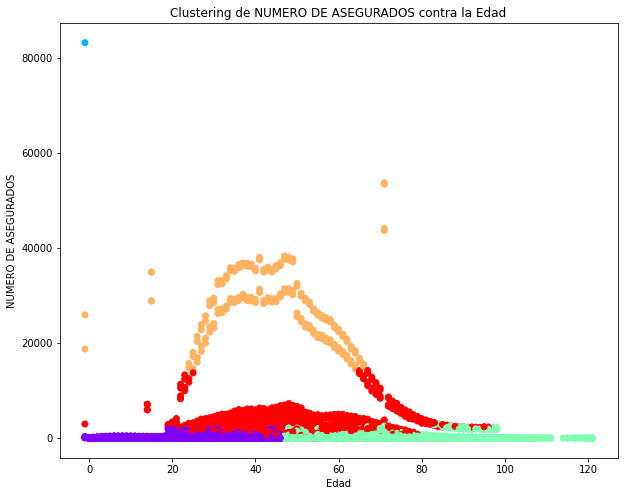

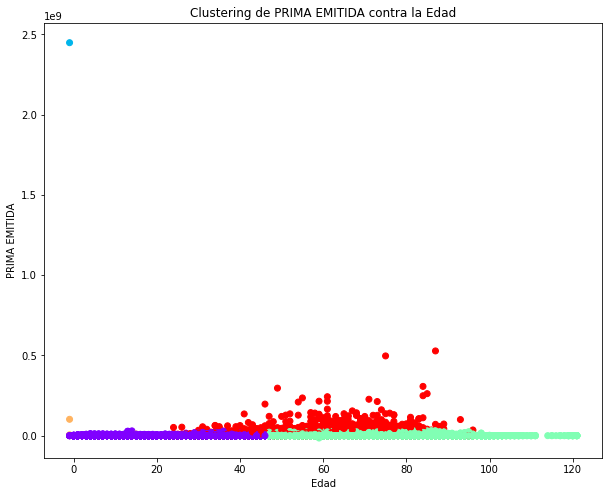

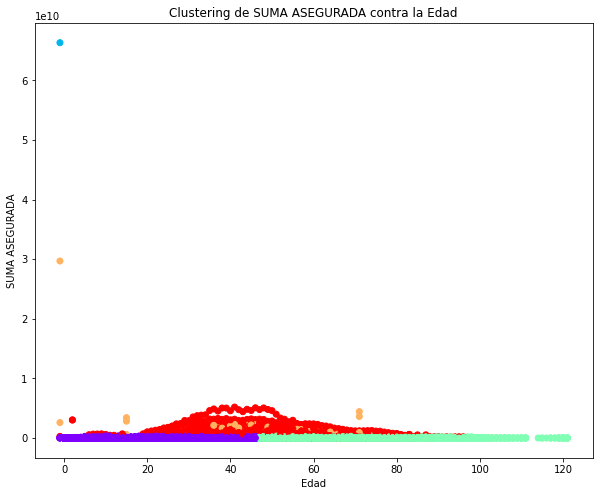

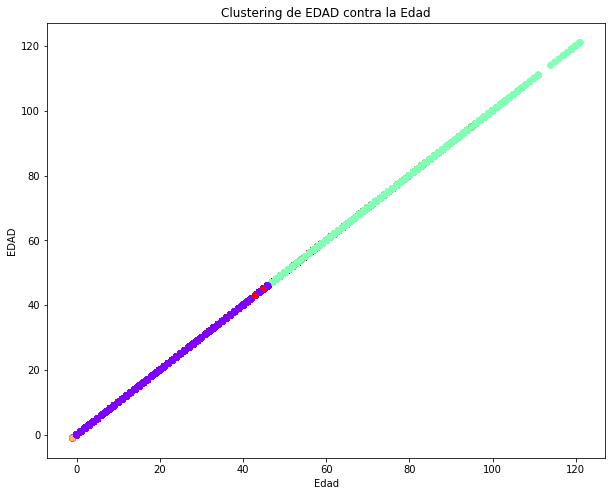

In [31]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(df['EDAD'], df[col], c=labels, cmap='rainbow')
    ax.set_xlabel('Edad')
    ax.set_ylabel(col)
    ax.set_title(f'Clustering de {col} contra la Edad')
    plt.show()


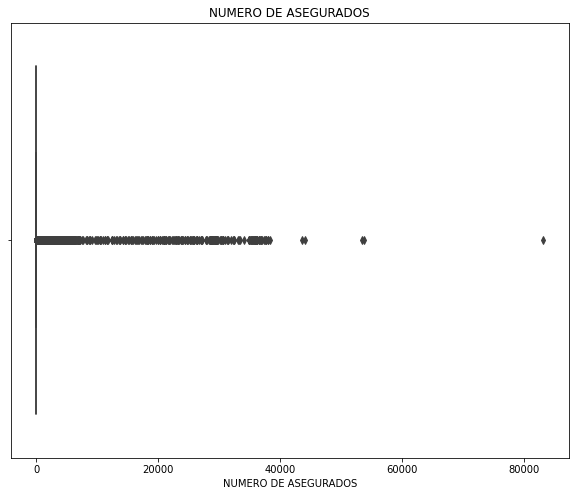

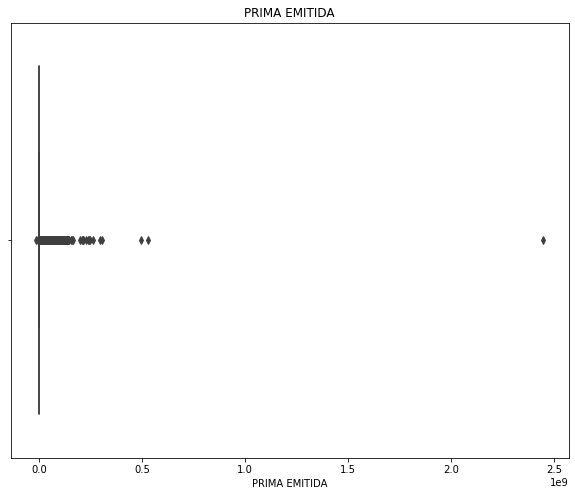

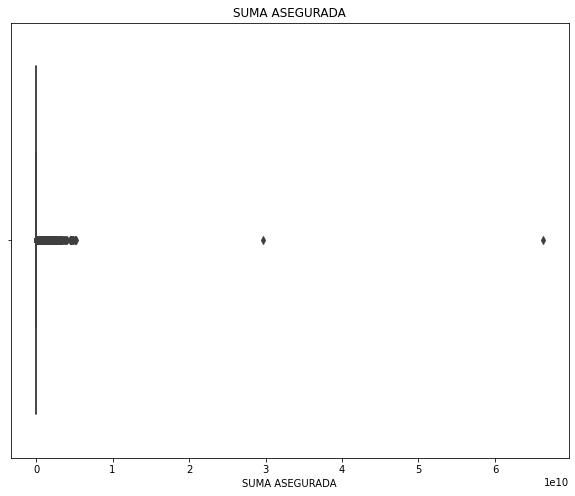

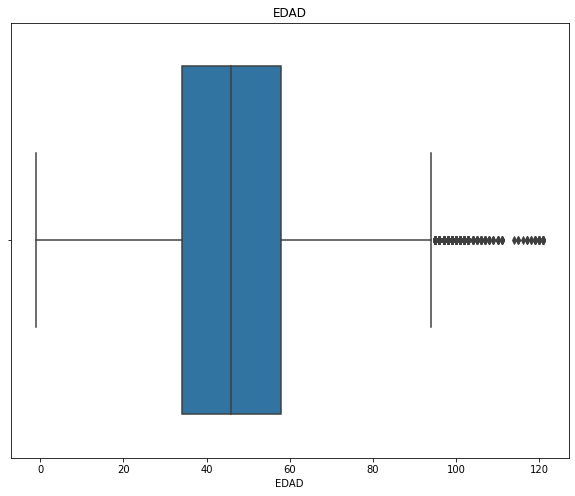

In [32]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    plt.show()